In [1]:
# CELL1 – 2 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

unis = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx', index_col='Rank')
unis = unis.rename_axis(None, axis=0)

unis


Populating the interactive namespace from numpy and matplotlib


,Institution Name,Location,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
2,STANFORD UNIVERSITY,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
3,HARVARD UNIVERSITY,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
5,UNIVERSITY OF CAMBRIDGE,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6
...,...,...,...,...,...,...,...,...,...
196,TECHNISCHE UNIVERSITÄT DRESDEN,Germany,41.5,77.0,6.8,79.0,92.4,38.5,48.1
197,TEXAS A&M UNIVERSITY,United States,69.7,54.1,10.2,57.0,10.4,15.5,48.1
198,UNIVERSITAT AUTÓNOMA DE BARCELONA,Spain,72.1,41.5,19.0,43.7,21.5,28.6,48.1
199,TECNOLÓGICO DE MONTERREY (ITESM),Mexico,42.8,84.9,77.1,3.7,98.4,23.2,48.0


In [2]:
# CELL2 – 2 marks

qsuk = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx', index_col=2)

qsukdf = qsuk[(qsuk.Location == 'United Kingdom')]
qsukdfn = qsukdf.reset_index()
qsukdfn.index = qsukdfn.index + 1

qsdf = qsukdfn.drop(['Location', 'Rank'], axis=1)

qsdf


,Institution Name,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
1,UNIVERSITY OF CAMBRIDGE,100.0,100.0,100.0,78.3,97.4,97.7,95.6
2,UNIVERSITY OF OXFORD,100.0,100.0,100.0,76.3,98.6,98.5,95.3
3,UCL (UNIVERSITY COLLEGE LONDON),99.7,99.5,99.1,74.7,96.6,100.0,94.6
4,IMPERIAL COLLEGE LONDON,99.4,100.0,100.0,68.7,100.0,100.0,93.7
5,KING'S COLLEGE LONDON (KCL),92.8,92.4,87.6,64.8,97.4,99.2,86.9
6,UNIVERSITY OF EDINBURGH,99.1,96.6,83.2,55.5,94.9,98.6,86.9
7,THE UNIVERSITY OF MANCHESTER,97.4,99.4,75.4,47.5,89.3,98.3,83.0
8,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,90.3,100.0,55.9,71.7,100.0,100.0,81.8
9,UNIVERSITY OF BRISTOL,85.7,95.5,79.2,56.4,87.9,79.2,79.5
10,THE UNIVERSITY OF WARWICK,83.5,98.9,51.2,54.1,98.0,99.0,74.4


In [16]:
# CELL3 – 5 marks

import numpy as np

unis = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx', index_col='Rank')
unis = unis.rename_axis(None, axis=0)

ukunis = unis[(unis.Location == 'United Kingdom')]

avg = np.mean(ukunis['Academic Reputation'])
err = 1.96 * stats.tstd(ukunis['Academic Reputation']) / np.sqrt(len(ukunis['Academic Reputation']))
err_lb = avg - err
err_ub = avg + err

print('mean of Academic Reputation = ', round(avg, 2))
print('minimum of Academic Reputation = ', min(ukunis['Academic Reputation']))
print('maximum of Academic Reputation = ', max(ukunis['Academic Reputation']))
print('standard deviation of Academic Reputation = ', round(stats.tstd(ukunis['Academic Reputation']),2))
print('95%% confidence interval of Academic Reputation = (%s, %s)' % (round(err_lb, 2), round(err_ub, 2)))


mean of Academic Reputation =  70.51
minimum of Academic Reputation =  39.4
maximum of Academic Reputation =  100.0
standard deviation of Academic Reputation =  21.45
95% confidence interval of Academic Reputation = (62.56, 78.45)


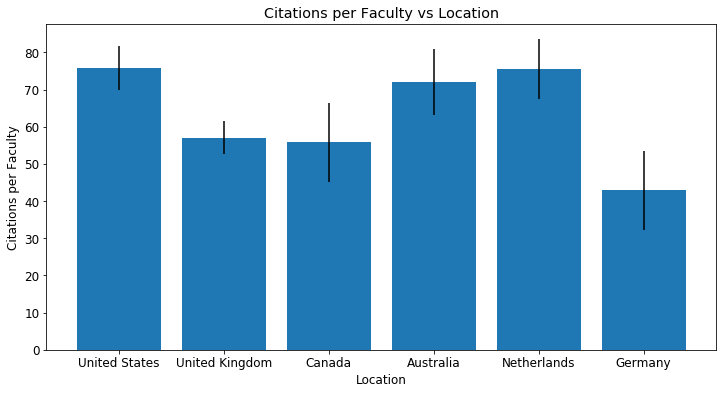

In [4]:
# CELL4 – 9 marks

import matplotlib.pyplot as plt
import numpy as np

def calc_err(data, avg):
    return 1.96 * stats.tstd(data) / np.sqrt(len(data))

unis = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx', index_col='Rank')

x = ['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Germany']
y = []
y_conf = []

for location in x:
    cpf = unis.loc[unis['Location'] == location]['Citations per Faculty']
    avg = np.mean(cpf)
    
    y.append(avg)
    y_conf.append(calc_err(cpf, avg))

# Create bar chart
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,6))

plt.bar(x, y, yerr=y_conf, ecolor='black')

plt.xlabel("Location")
plt.ylabel("Citations per Faculty")
plt.title("Citations per Faculty vs Location")

plt.show()


In [5]:
# CELL5 – 7 marks
unis = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx', index_col='Rank')

# Plot bar chart to compare?
def make_string(data, result):
    return ''.join(['\n - %s: %s' % (data[i], result[i]) for i, v in enumerate(data)])

def compare(data):
    sets = [unis.loc[unis['Location'] == i]['Citations per Faculty'] for i in data]
    
    tests = {}
    tests['Mean'] = [round(np.mean(i), 2) for i in sets]
    tests['Standard Deviation'] = [round(stats.tstd(i), 2) for i in sets]
    tests['Median'] = [np.median(i) for i in sets]
    tests['75th percentile'] = [np.percentile(i, 75) for i in sets]
    tests['25th percentile'] = [np.percentile(i, 25) for i in sets]
    tests['Min value'] = [min(i) for i in sets]
    tests['Max value'] = [max(i) for i in sets]
    
    for test in tests:
        result = tests[test]
        print('%s:%s\n' % (test, make_string(data, result)))

compare([
    'United States',
    'Netherlands'
])


Mean:
 - United States: 75.74
 - Netherlands: 75.49

Standard Deviation:
 - United States: 20.56
 - Netherlands: 13.01

Median:
 - United States: 75.8
 - Netherlands: 74.9

75th percentile:
 - United States: 95.95
 - Netherlands: 83.45

25th percentile:
 - United States: 60.65
 - Netherlands: 71.5

Min value:
 - United States: 23.4
 - Netherlands: 53.6

Max value:
 - United States: 100.0
 - Netherlands: 92.2



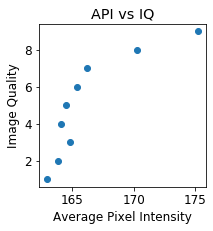

0.8413815147510217


In [15]:
# CELL6 – 8 marks
import matplotlib.pyplot as plt

x = []
y = []

def get_image_data(i):
    img = plt.imread('./Model/m%s.png' % i)*255
    imgm = matrix(img)
    return [img.mean(), 10-i]

for i in range(1, 10, 1):
    tmp = get_image_data(i)
    x.append(tmp[0])
    y.append(tmp[1])

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3,3))

plt.scatter(x, y)

plt.xlabel("Average Pixel Intensity")
plt.ylabel("Image Quality")
plt.title("API vs IQ")

plt.show()

print(stats.pearsonr(x, y)[0])


In [7]:
# CELL7 – 14 marks




In [8]:
# CELL8 – 13 marks




In [9]:
import scipy
print(scipy.__version__)

1.5.2
